In [1]:
#librerias base
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import defaultdict
import os,glob
import cv2
from sklearn import preprocessing

#keras - tensorflow
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten

# Autoencoders
Un autoencoder es un tipo de red neuronal artificial usado en aprendizaje sin supervisión, se utiliza principalmente para reducción de dimensionalidad ya que su finalidad es aprender una representación ***codificada*** de datos de alta dimensionalidad.

También puede utilizarse para la eliminación de ruido en imagenes, aplicación mostrada en el siguiente notebook.

Se utilizó el datasest Fingers, utilizado en la parte número 2 del proyecto.

In [2]:
#Carga de datos
X_train=[]
y_train=[]
os.chdir('C:/Users/Juan Carlos/Desktop/MaestriaDS/Tercer Trimestre/SL2/Proyecto/Parte4/test')
for i in os.listdir():
      img = cv2.imread(i)   
      img = cv2.resize(img,(128,128))
      X_train.append(img)
      y_train.append(i[-6:-4]) 

In [3]:
#Normalización de datos
X_train = np.asarray(X_train)
X_train = X_train.astype('float32') / 255.

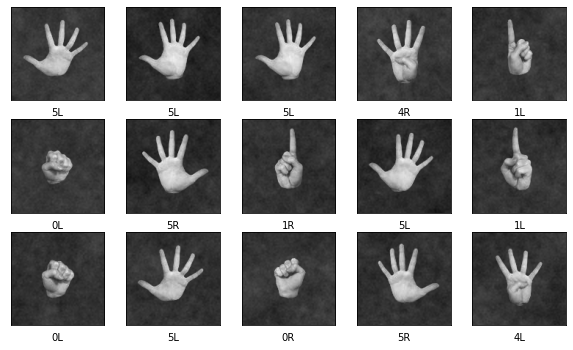

In [4]:
#Exploración de datos
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(y_train[i])
plt.show()

In [5]:
#Agregar ruido a imagenes
noise_factor = 0.5
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

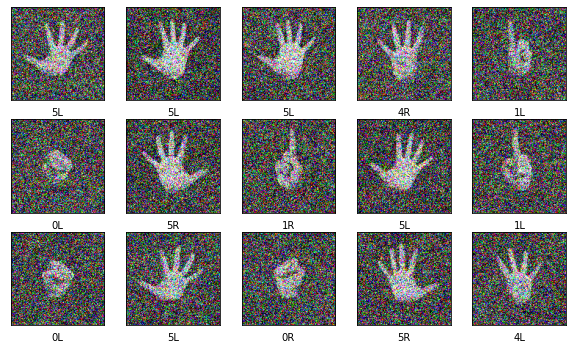

In [6]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_noisy[i].astype('float32'), cmap='gray')
    plt.xlabel(y_train[i])
plt.show()

# Modelo

In [7]:
input_img = keras.Input(shape=(128, 128, 3))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
x_train_noisy.shape, X_train.shape

((1140, 128, 128, 3), (1140, 128, 128, 3))

In [9]:
autoencoder.fit(x_train_noisy, X_train,
                epochs=25,
                batch_size=128,
                shuffle=True)

Epoch 1/25
9/9 [==============================] - 27s 3s/step - loss: 0.6105
Epoch 2/25
9/9 [==============================] - 26s 3s/step - loss: 0.5567
Epoch 3/25
9/9 [==============================] - 27s 3s/step - loss: 0.5373
Epoch 4/25
9/9 [==============================] - 27s 3s/step - loss: 0.5304
Epoch 5/25
9/9 [==============================] - 27s 3s/step - loss: 0.5279
Epoch 6/25
9/9 [==============================] - 27s 3s/step - loss: 0.5254
Epoch 7/25
9/9 [==============================] - 27s 3s/step - loss: 0.5232
Epoch 8/25
9/9 [==============================] - 27s 3s/step - loss: 0.5195
Epoch 9/25
9/9 [==============================] - 28s 3s/step - loss: 0.5141
Epoch 10/25
9/9 [==============================] - 27s 3s/step - loss: 0.5134
Epoch 11/25
9/9 [==============================] - 27s 3s/step - loss: 0.5127
Epoch 12/25
9/9 [==============================] - 26s 3s/step - loss: 0.5122
Epoch 13/25
9/9 [==============================] - 26s 3s/step - loss: 0.

In [10]:
x_decode = autoencoder.predict(x_train_noisy)

36/36 [==============================] - 4s 95ms/step


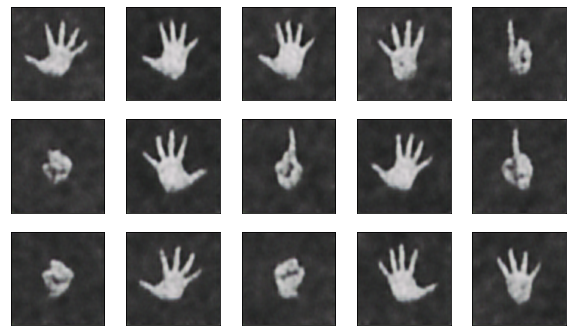

In [11]:
#Visualización de imagenes restauradas por la red neuronal
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_decode[i], cmap='gray')
plt.show()

# Conclusiones

Se observo la aplicación de una red neuronal que permite la eliminación de ruido en un conjunto de imagenes.

Adjunto diagrama final de modelo.


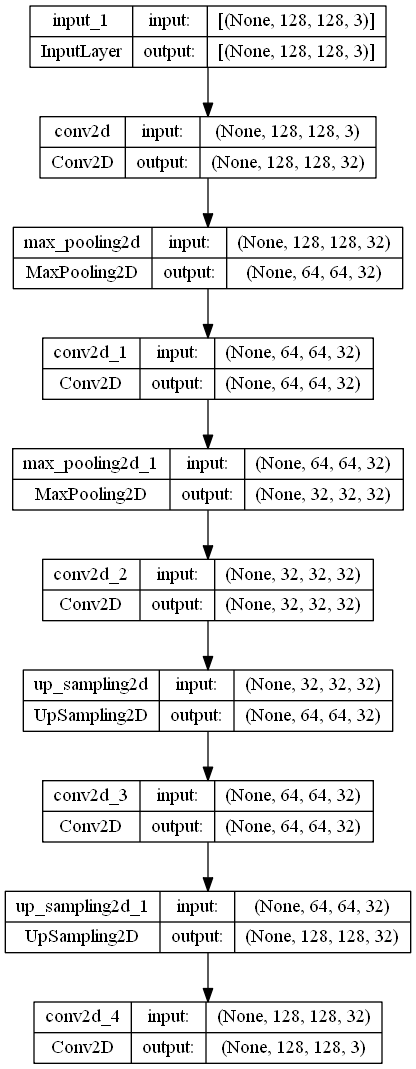

In [12]:
plot_model(autoencoder, to_file='Parte4.png', show_shapes=True, show_layer_names=True)

# Publicación
El proceso de publicación de la red entrenada a produción se puede realizar guardando los pesos de la red en un archivo ***HDF5***, formato utilizado por Keras.

Para realizar un despliegue por ejemplo a una página web, se puede usar un framework muy liviando de frontend para utlizar python como backend, según la investigación realizada ***Flask*** es la herramienta utilizada generalmente.